# Assignment 9

In this assignment we'll re-examine the `Road_Casualties_in_Great_Britain_1969___84_434_19.txt` data set from homework 5. 

## Instructions

Please complete this Jupyter notebook and **don't** convert it to a `.py` file. Upload this notebook, along with any `.stan` files and any data sets as a `zip` file to Gradescope. Your work will be manually graded by our TA. 

Protip: if you write your `.stan` file generally enough, it will work with most of the models below, and you won't need to keep recompiling the model object!


In [1]:
import pandas as pd
import numpy as np
import os
from cmdstanpy import CmdStanModel
import matplotlib.pyplot as plt

## Data Description

This is a road safety data set for car drivers in Great Britain killed or seriously injured Jan 1969 to Dec 1984. Each row of data corresponds to one month of time. 

The primary question of interest for us is to determine whether the introduction of seat belt laws saves lives. 

### Explanation of columns:

 - `DriversKilled` : number car drivers killed.
 - `drivers`: total number of drivers killed or seriously injured
 - `front`: front-seat passengers killed or seriously injured.
 - `rear`: rear-seat passengers killed or seriously injured
 - `kms`: distance driven.
 - `PetrolPrice`: the price of gas
 - `VanKilled`: number of van (‘light goods vehicle’) drivers.
 - `law`: was the law in effect that month? $0$ if not, $1$ if it was


In [2]:
road_data = pd.read_csv("Road_Casualties_in_Great_Britain_1969___84_434_19.csv")
road_data.head()

Unnamed: 0  X  DriversKilled  drivers  front  rear    kms  PetrolPrice  \
0           1  1            107     1687    867   269   9059     0.102972   
1           2  2             97     1508    825   265   7685     0.102363   
2           3  3            102     1507    806   319   9963     0.102062   
3           4  4             87     1385    814   407  10955     0.100873   
4           5  5            119     1632    991   454  11823     0.101020   

   VanKilled  law  
0         12    0  
1          6    0  
2         12    0  
3          8    0  
4         10    0

## Problem 1:

Recall the arithmetic we did for coming up with an interpretation for the coefficients of a logistic regression model. Perform an analogous derivation for the coefficients of a Poisson regression model. Attach your screenshotted work to this notebook. 



In [3]:
# screenshot goes here

## Problem 2:

Fit the following model. Discuss the posterior you found in detail. 

 - $y$ is the monthly sum of `drivers`, `front`, and `rear`.
 - $x_1$ is `PetrolPrice`
 - $x_2$ is the `law` dummy variable

$$
\log(\lambda) = \beta_0 + \beta_1 x_1 + \beta_2 x_2 
$$

$$
y \mid x_1, x_2 \sim \text{Poisson}(\lambda)
$$

In [4]:
# work goes here

## Problem 2:

Come up with some posterior (predictive) summary that suggests you might be missing a predictor that has to do with time!


In [5]:
# work goes here

## Problem 3:

Unfortunately, the previous model doesn't not capture any effect that time might have on the accident rate. You might reason accident rates depend on the month. 

Fit the following model. Discuss the posterior you found in detail. 

 - $y$ is the monthly sum of `drivers`, `front`, and `rear`.
 - $x_1$ is `PetrolPrice`
 - $x_2$ is the `law` dummy variable
 - $x_3$ is $1$ if it's February
 - $\vdots$
 - $x_{14}$ is $1$ if it's December

$$
\log(\lambda) = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \cdots + \beta_{14} x_{14}
$$

$$
y \mid x_1, \ldots, x_{14} \sim \text{Poisson}(\lambda)
$$

Notice that you have $11$ new dummy variables. January is our baseline and so does not require one. The first observation is January, and it proceeds sequentially with no missing months.

In [6]:
# work goes here

## Problem 4:

Another way to capture a seasonal affect is to use a sine/cosine wave. This does not require a separate predictor for every month. Consider the following function:

$$
A \cos(2 \pi t \frac{1}{12} + \phi)
$$

 - $A$ is the *amplitude* that stretches to standard cosine wave up or down
 - $1/12$ is the *frequency*. In this case, a cycle is made every $12$ observations (we have monthly data).
 - $\phi$ is the *phase* that adjusts the wave to start at something different than $1$
 - $t = 1,2,\ldots$ is time or in our case the row number

We can visualize this function as a function of $t$. Notice that the distance from peak to peak, from trough to trough is exactly the reciprocal of the frequency. The frequency flipped is called the *period*.

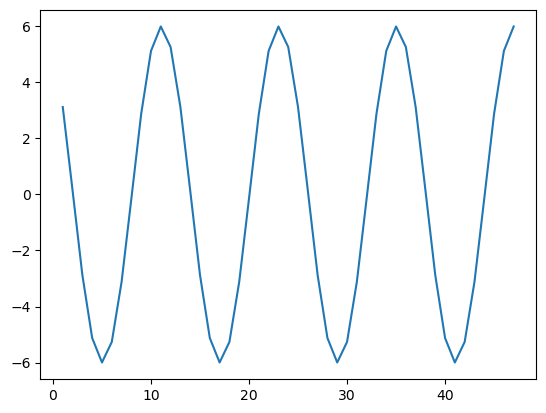

In [7]:
A = 6
phi = 1/2
t = np.arange(1,48)
freq = 1/12
wave = A*np.cos(2*np.pi*freq*t + phi)
plt.plot(t,wave)

The unknown quantities are the phase and the amplitude. If we wanted to estimate these numbers using linear regression, we wouldn't be able to use this expression indirectly. The unknown coefficients are not betas and are not multiplied by the predictor in a linear way.

We could use a nonlinear regression, or we could cleverly use some clever trigonometry to rewrite the above function as

$$
\beta_{3} \cos(2 \pi t [1/12]) + \beta_{4}\sin(2 \pi t [1/12]).
$$

We'll add two predictors. One for $\cos(2 \pi t [1/12])$ and the other for $\sin(2 \pi t [1/12])$. 


Now I can ask you to fit the following model, and discuss the posterior you found. 

$$
\log(\lambda) = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \beta_{3} x_{3} + \beta_4 x_4
$$

$$
y \mid x_1, \ldots, x_{4} \sim \text{Poisson}(\lambda)
$$

 - $y$ is the monthly sum of `drivers`, `front`, and `rear`.
 - $x_1$ is `PetrolPrice`
 - $x_2$ is the `law` dummy variable
 - $x_3$ is $\cos(2 \pi t [1/12])$ with $t$ indicating the row number.
 - $x_{4}$ is $\sin(2 \pi t [1/12])$



In [8]:
# work goes here

## Problem 5:

We should also discuss **offsets** which is another trick you can use in Poisson regression. 

In Poisson regression, we estimate the varying $\lambda$. This is the average number of occurences of a count. Each row has a different average depending on what that row's predictors are.

However, sometimes one is interested or compelled to estimate a *rate*. 

A rate can be thought of as an average count **per unit of something else.** It can be average count *per unit time* or average count *per unit space* or something else. Then there is a simple transformation you can make to your model that will allow a Poisson regression to be employed. 

Let's suppose we are interest in estimating $\lambda / \text{time}$. Suppose $\text{time}$ is different for each row, and that's why we want to take it into account. 


If 
$$
\log\left(\frac{\lambda}{\text{time}}\right) = \beta_0 + \beta_1 x_1 + \beta_2 x_2 
$$

then

$$
\log\left(\lambda\right) = \log(\text{time}) + \beta_0 + \beta_1 x_1 + \beta_2 x_2 
$$

So, an **offset is a predictor that has a forced coefficient of $1$**.

NB: We aren't going to use time in our problem below--because every row has the same amount of time: one month--but this is just an assumption for my explanation.  


Fit the following model to estimate the average rate of accidents **per kilometer driven**. Discuss the posterior you found in detail. Comment on whether ommitting any time predictors is stil problematic with this offset. Also comment on whether the two original predictors are still deserving enough to be included.



$$
\log\left(\frac{\lambda}{\text{kms}}\right) = \beta_0 + \beta_1 x_1 + \beta_2 x_2 
$$


 - $y$ is the monthly sum of `drivers`, `front`, and `rear`.
 - $x_1$ is `PetrolPrice`
 - $x_2$ is the `law` dummy variable
 - $\text{kms}$ is an offset relating to the `kms` column


## Problem 6:

Recommend a final model that is a revisement of the previous model. Estimate it in `stan` and discuss the posterior in detail. Comment on whether you believe the seat belt law has an effect!

